In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Wyniki 2005/07/11

In [2]:
wyniki_2005 = pd.read_csv("wyniki_wyborow/"+"2005_O"+".csv")
col = wyniki_2005.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2005.columns = col
wyniki_2005['jednostka'] = [ w.replace('O_', '') for w in wyniki_2005['jednostka'] ]
wyniki_2005 = wyniki_2005.fillna(0)

In [3]:
wyniki_2007 = pd.read_csv("wyniki_wyborow/"+"2007_O"+".csv")
col = wyniki_2007.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2007.columns = col
wyniki_2007['jednostka'] = [ w.replace('O_', '') for w in wyniki_2007['jednostka'] ]
wyniki_2007 = wyniki_2007.fillna(0)

In [4]:
wyniki_2011 = pd.read_csv("wyniki_wyborow/"+"2011_O"+".csv")
col = wyniki_2011.columns.values.tolist()
col[0] = 'jednostka'
wyniki_2011.columns = col
wyniki_2011['jednostka'] = [ w.replace('O_', '') for w in wyniki_2011['jednostka'] ]
wyniki_2011 = wyniki_2011.fillna(0)

# 2015

In [5]:
list_excel = []
for i in range(41):
    excel_pd = pd.read_excel('wyniki_wyborow/2015/'+str(i+1).zfill(2)+'.xlsx').fillna(0)
    cols_new = [True if 'Razem KW' in ec else False for ec in excel_pd.columns.values.tolist()]
    cols_new = excel_pd.columns[cols_new]
    excel_pd = excel_pd[cols_new]
    excel_pd = excel_pd.replace(to_replace="XXXXX",value =0) 
    excel_pd = excel_pd.apply(pd.to_numeric)
    excel_pd = excel_pd.sum()
    list_excel.append(excel_pd)
df_2015 = pd.concat(list_excel, axis=1).T.fillna(0)

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


# 2019

In [6]:
df_2019 = pd.read_csv('wyniki_wyborow/2019_O.csv', delimiter =';').fillna(0)
col = df_2019.columns.values.tolist()
select_col=[ 'Województwo',
             'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19',
             'KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19',
             'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19',
             'KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19',
             'KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19',
             'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19',
             'KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19',
             'KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19',
             'KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19',
             'KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19']
to_group=['Województwo']
df_2019 = df_2019.loc[df_2019['Województwo'] != 0, :]
df_2019[select_col]
df_2019[select_col[1:]] = df_2019[select_col[1:]].apply(pd.to_numeric)
df_output = df_2019[select_col].groupby(to_group).agg(['sum'])
#df_output

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Jednostki - województwa - łączenie

In [7]:
df_jednostki = pd.read_csv('dane/_jednostki.csv', sep=';')
df_jednostki.okręgi = [ o.replace(' ', '_') for o in df_jednostki.okręgi ]
df_jednostki.województwo = [ w.upper() for w in df_jednostki.województwo ]
df_jednostki

,nr,okręgi,powiaty,województwo
0,1,Legnica,"powiaty: bolesławiecki, głogowski, jaworski, j...",DOLNOŚLĄSKIE
1,2,Wałbrzych,"powiaty: dzierżoniowski, kłodzki, świdnicki, w...",DOLNOŚLĄSKIE
2,3,Wrocław,"powiaty: górowski, milicki, oleśnicki, oławski...",DOLNOŚLĄSKIE
3,4,Bydgoszcz,"powiaty: bydgoski, inowrocławski, mogileński, ...",KUJAWSKO-POMORSKIE
4,5,Toruń,"powiaty: aleksandrowski, brodnicki, chełmiński...",KUJAWSKO-POMORSKIE
5,6,Lublin,"powiaty: janowski, kraśnicki, lubartowski, lub...",LUBELSKIE
6,7,Chełm,"powiaty: bialski, biłgorajski, chełmski, hrubi...",LUBELSKIE
7,8,Zielona_Góra,województwo lubuskie,LUBUSKIE
8,9,Łódź,powiaty: brzeziński i łódzki wschodni; miasto ...,ŁÓDZKIE
9,10,Piotrków_Trybunalski,"powiaty: bełchatowski, opoczyński, piotrkowski...",ŁÓDZKIE


In [32]:
klucz = df_jednostki[['nr','województwo']]
woj_set = set(klucz['województwo'])
years = ['jednostka']+[str(w) for w in np.arange(2001,2019).tolist()]

# Dane statystyczne

In [52]:
features = [['155055', 'emeryci_i_rencisci'], #przeciętna liczba emerytów i rencistów ogółem (NUTS-2)
            ['33507', 'bezrobocie_zarejsestrowane'], #Bezrobotni zarejestrowani ogółem (P)
            ['10514', 'bezrobocie_zarejsestrowane_gminy'], #Bezrobotni zarejestrowani ogółem (G, 2003-)
            ['58', 'malzenstwa_zawarte'], # (G)
            ['60559', 'ludnosc_na_1km2'], #(G, 2002 -)
            ['76037', 'dochody_gminy'], # (G)
            ['76973','dochody_na_mieszkanca'], #(G, 2002-)
            ['479300', 'wyksztalcenie_wyzsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            ['478931', 'wyksztalcenie_gim_pod_nizsze'], #(NUTS 2)   Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.) 
            ['478929', 'wyksztalcenie_srednie' ], #(NUTS 2)  średnie (łącznie ze średnim zawodowym i ogólnokształcącym); Odsetek ludności w wieku 15-64 lata z wykształceniem wyższym wg płci i miejsca zamieszkania - różnica w stosunku do średniej krajowej (p.proc.)            
            ['35039', 'rozwody_powiat'], # (P)
            ['60567', 'udzial_wiek_przedprodukcyjny'], # (G, 2002 -) Udział ludności wg ekonomicznych grup wieku w % ludności ogółem, przedprodukcyjny
            ['60566', 'udzial_wiek_produkcyjny'], # (G, 2002 -) produkcyjny
            ['60565', 'udzial_wiek_poprodukcyjny'], # (G, 2002 -) postprodukcyjny
            ['216969', 'praca_najemna'], # (NUTS 2) Przeciętny miesięczny dochód rozporządzalny na 1 osobę"
            ['216971', 'praca_wlasny_rachunek'], # (NUTS 2) 
            ['519999', 'socjal_500plus'], # (NUTS 2, 2016 -) 
            ['216972', 'socjal'], # (NUTS 2)
            ['458417', 'dochody_brutto_na_mieszkanca'], # (NUTS 2) dochody do dyspozycji brutto na 1 mieszkańca
            ['458421', 'PKB_na_1_mieszkanca'],  # (NUTS 2)
            #['458430', 'PKB_na_1_mieszkanca_ceny_stale'],  # (NUTS 2)
            ['58559', 'przestepstwa_ogolem'] # (NUTS 3, powiaty, 2002 -)
            ]

In [55]:
features_list = {}
for f in features:
    temp_df = pd.read_csv("dane/"+f[1]+".csv", sep=',')
    if(f[1] == 'PKB_na_1_mieszkanca'):
        f_tmp = pd.read_csv("dane/PKB_na_1_mieszkanca_szacunki.csv", sep=',')
        temp_df['2018'] = f_tmp['2018']
    features_list[f[1]] = temp_df.loc[temp_df['jednostka'].isin(woj_set), years].reset_index() 
    del features_list[f[1]]['index'] 

## Łączenie danych po latach

In [56]:
df_years = {}
for y in years[1:]:
    f = features[0]
    df_years[y] = features_list[f[1]].loc[:,['jednostka']]
    for f in features:
        df_y = features_list[f[1]].loc[:,['jednostka',y]]
        df_y.columns = ['jednostka',f[1]]
        df_years[y] = df_years[y].merge(df_y,how='outer',on=['jednostka'])
    df_years[y].to_csv('dane_years/'+y+'.csv', index = False)

## Przykład łaczenia i agregacji

In [ ]:
# Łaczenie
wyn_05 = wyniki_2005.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])
# aggregacja
wyn_05.groupby('województwo').agg({'PO': np.mean, 'PIS': np.mean}).reset_index()

#### Przykład z jednymi danymi

In [11]:
emeryci_i_rencisci = pd.read_csv("dane/"+"emeryci_i_rencisci"+".csv", sep=',')
emeryci_i_rencisci_2005 = emeryci_i_rencisci[['jednostka', '2001' , '2002', '2003', '2004']]
emeryci_i_rencisci_2005.columns = ['jednostka', 'eir_2001' , 'eir_2002', 'eir_2003', 'eir_2004']

In [14]:
wyniki_2005['PIS'] = wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']/(wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']+wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP'])
wyniki_2005['PO'] = wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP']/(wyniki_2005['Komitet Wyborczy Prawo i Sprawiedliwość']+wyniki_2005['Komitet Wyborczy Platforma Obywatelska RP'])
wyniki_2005 = wyniki_2005[['jednostka', 'PO', 'PIS']]

In [20]:
wyn_05 = wyniki_2005.merge(df_jednostki,how='outer',left_on=['jednostka'],right_on=['okręgi'])
wyn_05 = wyn_05[['jednostka', 'PO', 'PIS', 'województwo']]
wyn_05 = wyn_05.groupby('województwo').agg({'PO': np.mean, 'PIS': np.mean}).reset_index()

In [20]:
wyn_05_eir = wyn_05 .merge(emeryci_i_rencisci_2005,how='inner',left_on=['województwo'],right_on=['jednostka'])
wyn_05_eir = wyn_05_eir.set_index('województwo').drop(['jednostka'], axis = 1)
wyn_05_eir

,PO,PIS,eir_2001,eir_2002,eir_2003,eir_2004
województwo,,,,,,
DOLNOŚLĄSKIE,0.530790,0.469210,688366.0,679217.0,675162.0,674851.0
KUJAWSKO-POMORSKIE,0.454183,0.545817,469368.0,465129.0,464483.0,466143.0
LUBELSKIE,0.375721,0.624279,591238.0,583287.0,576247.0,572526.0
LUBUSKIE,0.514617,0.485383,234017.0,230793.0,228805.0,228222.0
MAZOWIECKIE,0.361173,0.638827,1169706.0,1162884.0,1161704.0,1166887.0
MAŁOPOLSKIE,0.395179,0.604821,800306.0,783214.0,773596.0,768948.0
OPOLSKIE,0.541453,0.458547,214393.0,214031.0,213771.0,214176.0
PODKARPACKIE,0.306032,0.693968,500389.0,496365.0,493847.0,492628.0
PODLASKIE,0.348944,0.651056,287700.0,284768.0,283386.0,282145.0


In [21]:
corr = wyn_05_eir.corr()
corr.style.background_gradient(cmap='coolwarm')

,PO,PIS,eir_2001,eir_2002,eir_2003,eir_2004
PO,1,-1,-0.166713,-0.163148,-0.159146,-0.155614
PIS,-1,1,0.166713,0.163148,0.159146,0.155614
eir_2001,-0.166713,0.166713,1,0.999923,0.999742,0.999476
eir_2002,-0.163148,0.163148,0.999923,1,0.999941,0.99978
eir_2003,-0.159146,0.159146,0.999742,0.999941,1,0.999946
eir_2004,-0.155614,0.155614,0.999476,0.99978,0.999946,1


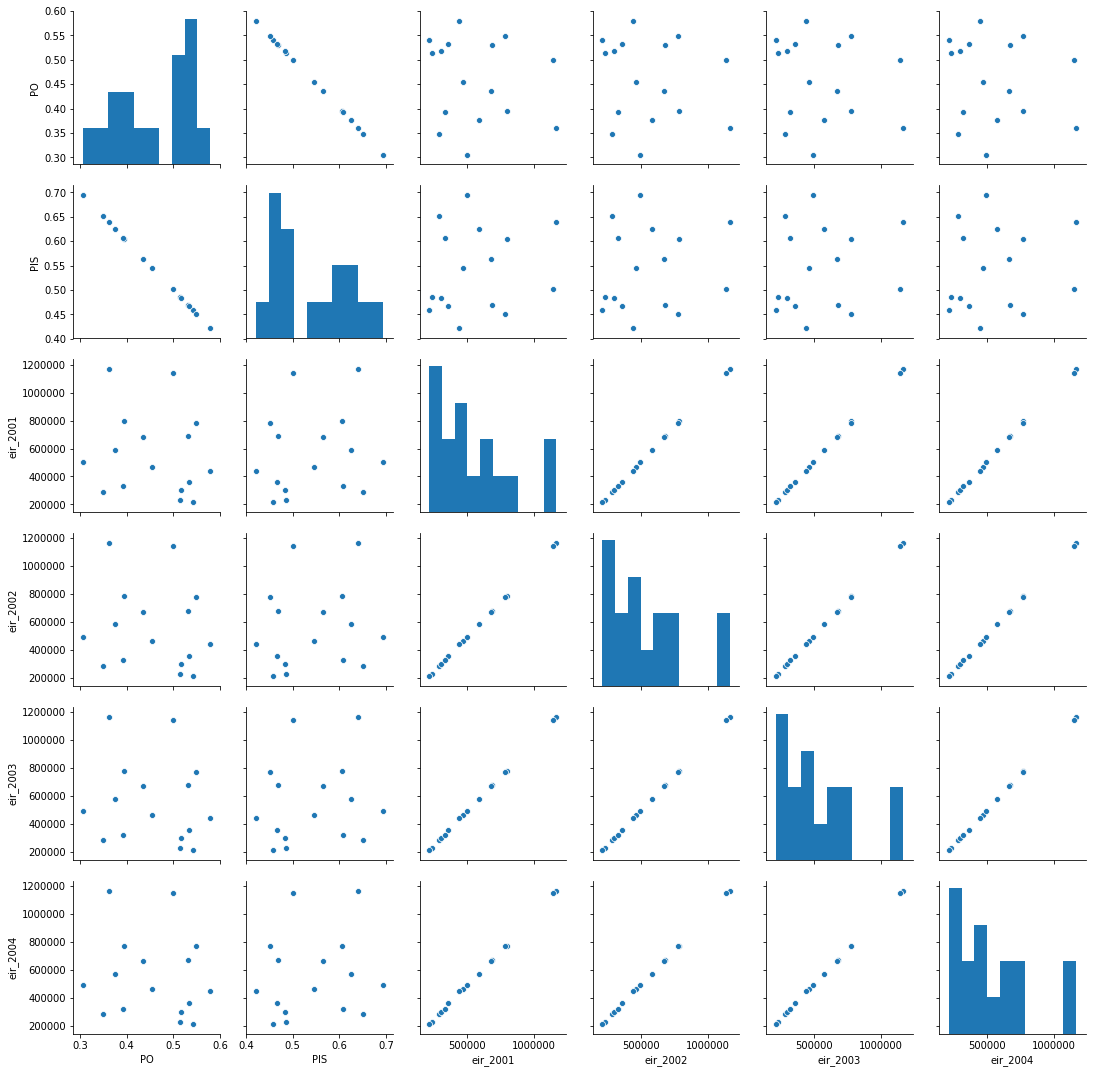

In [22]:
sns.pairplot(wyn_05_eir)